In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

In [2]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [3]:
from Imports import *
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


In [4]:
def plot_HR(ci, colors=None, ax=None):
    _, ax = init_ax(ax)
    if colors is None:
        colors = ['grey'] * ci.shape[0]
    ci = np.log2(ci)
    for i,(h,v) in enumerate(ci.iterrows()):
        ax.scatter(v['exp(coef)'], i, marker='s', s=100, color=colors[i], 
                   edgecolors=['black'], zorder=10)
        ax.plot((v['lower .95'],v['upper .95']), (i,i), 
                    lw=3, ls='-', marker='o', dash_joinstyle='bevel', 
                color=colors[i])
    prettify_ax(ax)
    ax.set_ybound(-.5, i + .5)
    ax.set_yticks(range(i+1))
    ax.set_yticklabels(ci.index)
    ax.axvline(0, ls='--', lw=2, color='grey', zorder=-1)
    ax.set_xticklabels(2.**ax.get_xticks())

In [5]:
matched_rna = pd.read_hdf('/data_ssd/RNASeq_2015_04_02.h5', 'matched_tn')

In [6]:
dx_rna = binomial_test_screen(matched_rna, fc=1.)
dx_rna = dx_rna[dx_rna.num_dx > 300]

In [7]:
fm = dx_rna.frac
fm.shape

(18465,)

In [8]:
rna_df = rna_df
pts = [p for p in rna_df.columns.get_level_values(0) if 
       (p,'01') in rna_df.columns and (p,'11') in rna_df.columns]
pts = list(set(pts))
len(pts)

669

In [9]:
mm = rna_df.xs('11',1,1).ix[:, pts].mean(1).ix[fm.index]
ss = rna_df.xs('11',1,1).ix[:, pts].std(1).ix[fm.index]

In [10]:
store = pd.HDFStore('/data_ssd/RNASeq_2015_04_02.h5')
rna_s = {}
for c in store.keys():
    if c in ['/matched_tn','/codes']:
        continue
    df = store[c].ix[fm.index]
    tissue = pd.value_counts(df.columns.get_level_values(1)).index[0]
    df = df.sub(mm, axis=0).div(ss, axis=0)
    rna_s[c] = df.corrwith(fm - .5)
rna_s = pd.concat(rna_s)
rna_s.index = rna_s.index.droplevel(0)
rna_s = rna_s.groupby(level=[0,1]).first()
rp = rna_s.dropna()

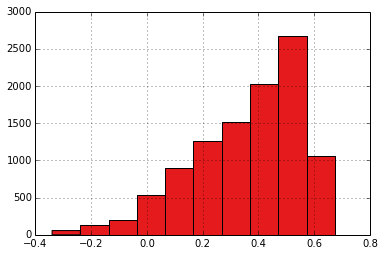

In [11]:
rp.hist()

In [12]:
mm = rna_df.xs('11',1,1).ix[:, pts].mean(1).ix[fm.index]
ss = rna_df.xs('11',1,1).ix[:, pts].std(1).ix[fm.index]
df = store[c].ix[fm.index]
tissue = pd.value_counts(df.columns.get_level_values(1)).index[0]
df = df.sub(mm, axis=0).div(ss, axis=0)

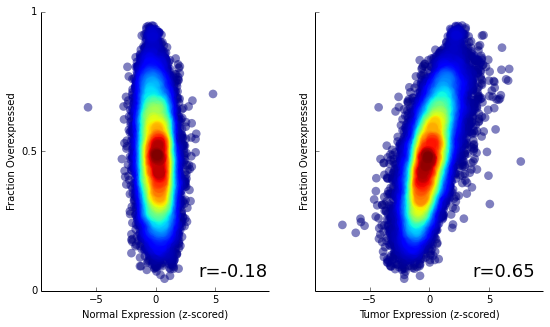

In [13]:
fig, axs = subplots(1,2, figsize=(9,5), sharey=True)
v = df.ix[:, 'TCGA-BH-A0BZ']['11']
plot_regression(v, (fm * 20) - 10, density=True, rad=.5,
               line_args={'lw': 0}, ax=axs[0])
axs[0].set_xlabel('Normal Expression (z-scored)')
v = df.ix[:, 'TCGA-BH-A0BZ']['01']
plot_regression(v, (fm * 20) - 10, density=True, rad=.5,
                line_args={'lw': 0}, ax=axs[1])
axs[1].set_xlabel('Tumor Expression (z-scored)')


for ax in axs:
    ax.set_yticks([-10,0,10])
    ax.set_yticklabels([0,.5,1])
    ann = ax.get_children()[4]
    ann.set_text(ann.get_text().split()[0])
    ax.set_ylabel('Fraction Overexpressed')

In [14]:
mm = rp.unstack()[['01','11']].dropna().stack()
((mm[:, '01'] - mm[:, '11']) > 0).value_counts()

True     659
False     10
dtype: int64

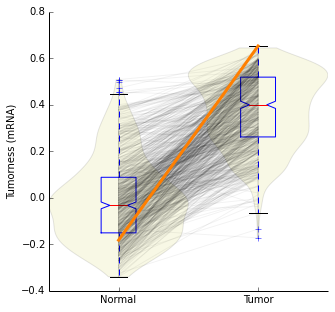

In [23]:
mm = rp.unstack()[['01','11']].dropna().stack()
fig, ax = subplots(figsize=(5,5))
violin_plot_series(mm, ax=ax, order=['11','01'], ann=None)

for i,v in mm.unstack().iterrows():
    ax.plot([0,1],[v['11'], v['01']], color='black', alpha=.05)
v = mm.ix['TCGA-BH-A0BZ']
ax.plot([0,1],[v['11'], v['01']], color=colors[4], alpha=1, lw=3)
ax.set_ylabel('Tumorness (mRNA)')
ax.set_xlabel('')
ax.set_xticklabels(['Normal','Tumor'])
prettify_ax(ax)
#fig.savefig(FIGDIR + 'tn_tumorness.png', dpi=300)

In [30]:
pwd

u'/cellar/users/agross/TCGA_Code/DX/Notebooks'

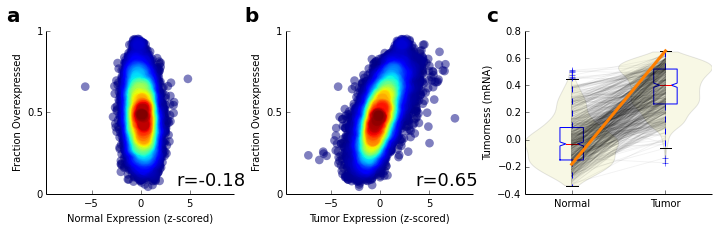

In [32]:
fig, axs = subplots(1,3, figsize=(10,3), sharey=False)
v = df.ix[:, 'TCGA-BH-A0BZ']['11']
plot_regression(v, (fm * 20) - 10, density=True, rad=.5,
               line_args={'lw': 0}, ax=axs[0])
axs[0].set_xlabel('Normal Expression (z-scored)')
v = df.ix[:, 'TCGA-BH-A0BZ']['01']
plot_regression(v, (fm * 20) - 10, density=True, rad=.5,
                line_args={'lw': 0}, ax=axs[1])
axs[1].set_xlabel('Tumor Expression (z-scored)')


for ax in axs[:2]:
    ax.set_yticks([-10,0,10])
    ax.set_yticklabels([0,.5,1])
    ann = ax.get_children()[4]
    ann.set_text(ann.get_text().split()[0])
    ax.set_ylabel('Fraction Overexpressed')

ax = axs[2]
mm = rp.unstack()[['01','11']].dropna().stack()
violin_plot_series(mm, ax=ax, order=['11','01'], ann=None)

for i,v in mm.unstack().iterrows():
    ax.plot([0,1],[v['11'], v['01']], color='black', alpha=.05)
v = mm.ix['TCGA-BH-A0BZ']
ax.plot([0,1],[v['11'], v['01']], color=colors[4], alpha=1, lw=3)
ax.set_ylabel('Tumorness (mRNA)')
ax.set_xlabel('')
ax.set_xticklabels(['Normal','Tumor'])
prettify_ax(ax)
fig.tight_layout()
letters = list(map(chr, range(97, 123)))[:6] 
for i,ax in enumerate(axs):
    ax.text(-0.15, 1.15, letters[i], transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='right')
    prettify_ax(ax)
fig.savefig(FIGDIR + 'tn_tumorness.png', dpi=300)

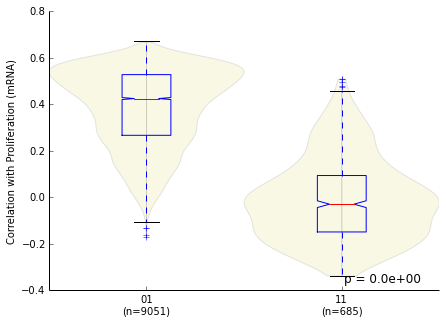

In [19]:
fig, ax = subplots(figsize=(7,5))
violin_plot_series(rp, ax=ax, order=['01','11'])
ax.set_ylabel('Correlation with Proliferation (mRNA)')
ax.set_xlabel('')
prettify_ax(ax)

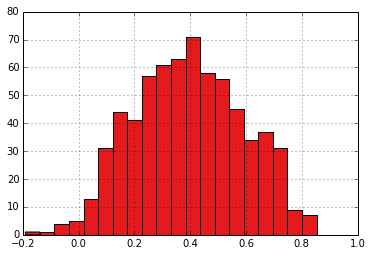

In [20]:
(rp[:, '01'] - rp[:, '11']).hist(bins=20)

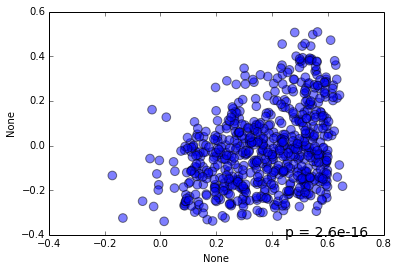

In [21]:
series_scatter(rp[:, '01'], rp[:, '11'])

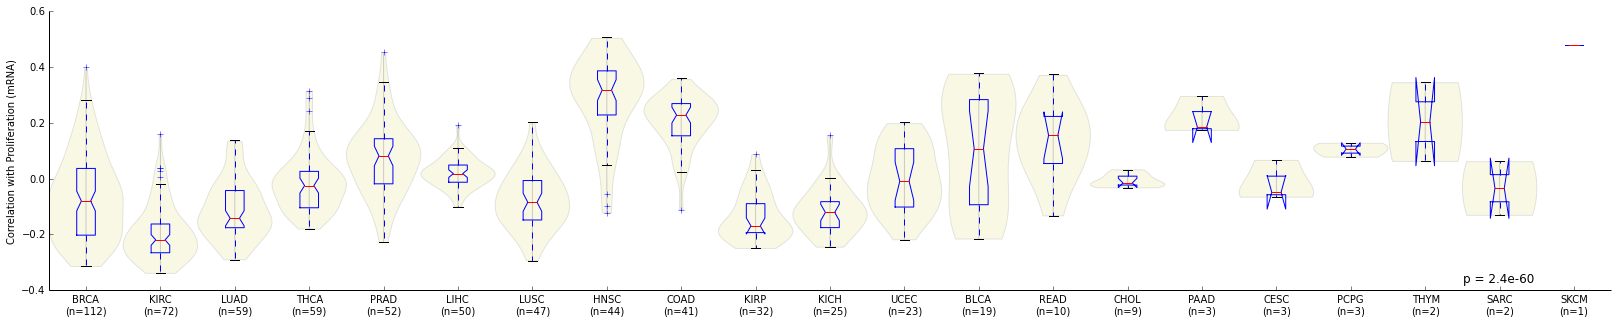

In [22]:
fig, ax = subplots(figsize=(28,5))
violin_plot_pandas(codes, rp[:,'11'], ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Correlation with Proliferation (mRNA)')
prettify_ax(ax)

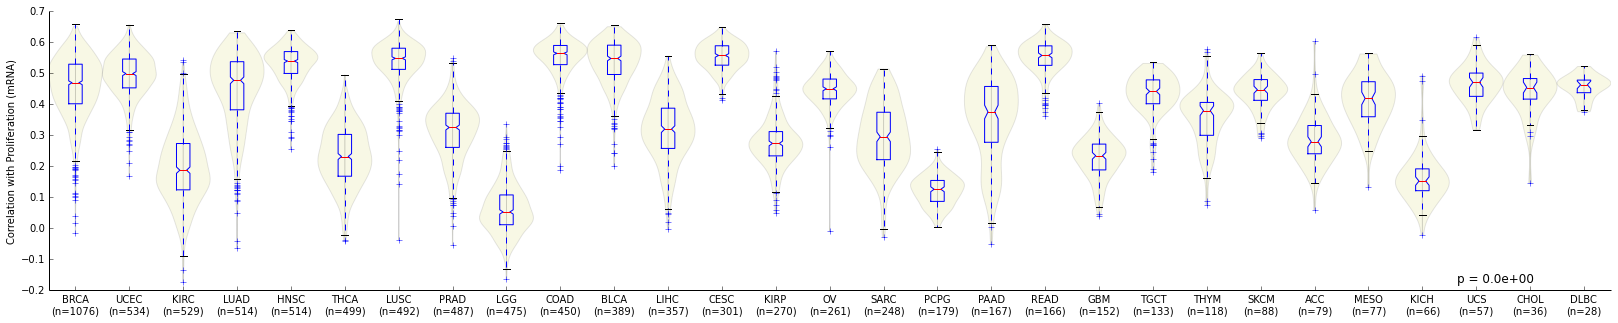

In [23]:
fig, ax = subplots(figsize=(28,5))
violin_plot_pandas(codes, rp[:,'01'], ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Correlation with Proliferation (mRNA)')
prettify_ax(ax)

In [24]:
from Figures.Boxplots import _violin_plot

In [25]:
import seaborn as sns

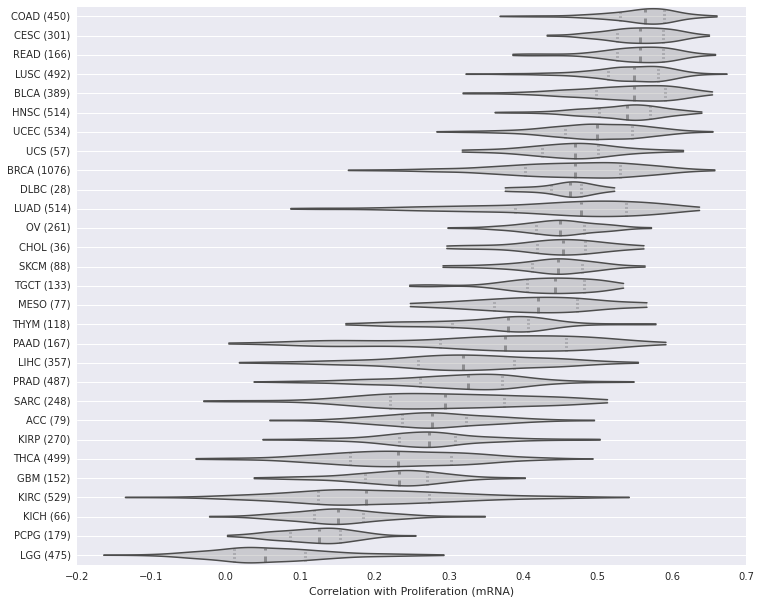

In [26]:
fig, ax = subplots(figsize=(12,10))
zscore = lambda s: (s - s.mean()) / s.std()
vv= rp[:,'01']
z = vv.groupby(codes).apply(zscore)
v2 = vv[z.abs() < 3]
o = v2.groupby(codes).mean().order().index
labels = vv.groupby(codes).size().ix[o]
labels = ['{} ({})'.format(i,v) for i,v in labels.iteritems()]
sns.violinplot(v2, groupby=codes, vert=False,
               bw='scott', cut=0, 
               order=o,
               color='grey', alpha=.3,
               inner_kws={'lw':3, 'alpha':1,'color':'black'},
               names=labels)
ax.set_xlabel('Correlation with Proliferation (mRNA)')
sns.despine(fig)

In [100]:
f = rp[:, '01'].copy()
f = (f - f.mean()) / f.std()
stage = stage.replace('stage_is', 'stage i')
m = get_cox_ph(surv_5y, f, [codes, stage, old, age], print_desc=False, interactions=False)
ci = convert_robj(robjects.r.summary(m)[7])
ci.index = ci.index.map(lambda s: s.replace('codes', ''))
ci.index = ci.index.map(lambda s: s.replace('stagestage', 'stage'))
pancan_ci = ci.ix['feature']
pancan_ci.name = 'PANCAN'

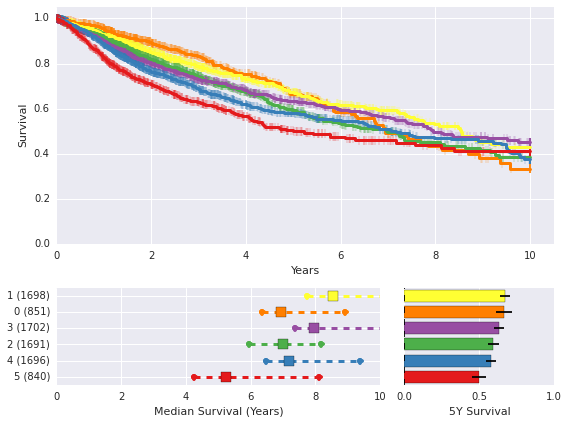

In [27]:
v = rp.ix[:, '01'].dropna()
v = v - codes.map(v.groupby(codes).median())
survival_and_stats(np.round((v.rank(pct=True) * 5)), surv_10y,
                   figsize=(8,6), upper_lim=10)

In [76]:
plt.rcParams['font.size'] = 18

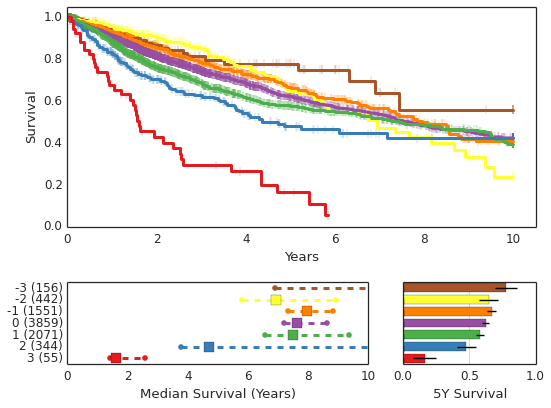

In [78]:
v = rp.ix[:, '01'].dropna()
v = v - codes.map(v.groupby(codes).median())
survival_and_stats(np.round((v - v.mean()) / v.std()).clip(-3,3), surv_10y,
                   order=[3,2,1,0,-1,-2,-3],
                   figsize=(8,6), upper_lim=10)
plt.savefig('/cellar/users/agross/Desktop/Figures/pc_surv.png',
            dpi=300)

In [87]:
ci['ACC']

,exp(coef),exp(-coef),lower .95,upper .95
feature,2.54,0.39,1.86,3.46
age_over_75,1.28,0.78,0.81,2.04
age,1.26,0.79,0.79,2.02


In [91]:
plt.rcParams['font.size'] = 18

In [102]:
ax.get_xbound()

(-8.0, 4.0)

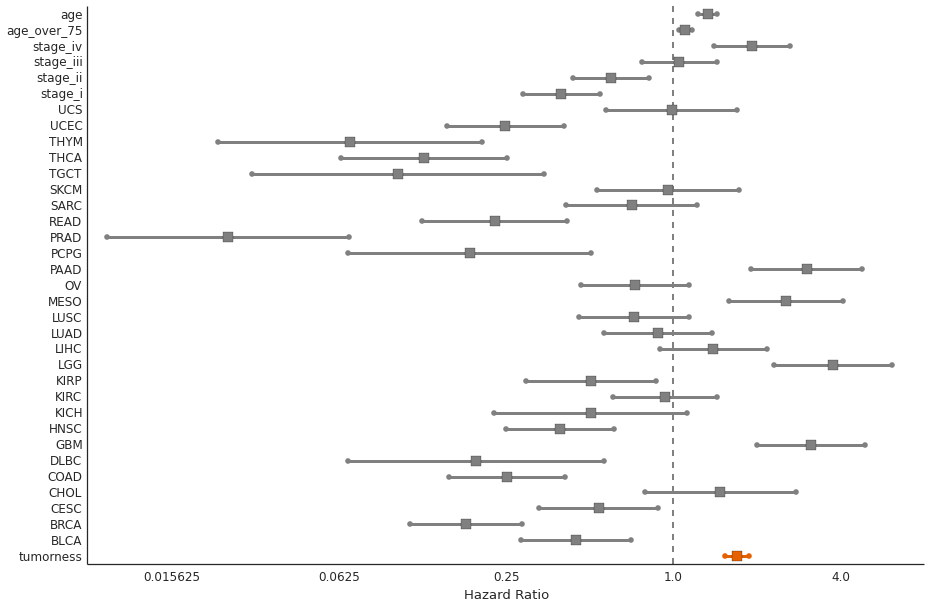

In [106]:
fig, ax = subplots(figsize=(15,10))
colors= ['#E66101'] + (['grey'] * (ci.shape[0] - 1))
plot_HR(ci.rename(index={'feature': 'tumorness'}), ax=ax, colors=colors)
ax.set_xlabel('Hazard Ratio')
ax.set_xbound(-7., 3)
fig.savefig('/cellar/users/agross/Desktop/Figures/mv_cox_tumorness.png',
           dpi=300)

#### Here I'm leaving out stage as an optimistic estimate

In [35]:
v = rp[:, '01'].dropna()
ci = {}
for c in codes.unique():
    try:
        pts = ti(codes == c)
        f = v.ix[pts].dropna()
        cov = [b.ix[pts].dropna() for b in [old, age] if 
               b.ix[pts].dropna().unique().shape[0] > 1]
        f = (f - f.mean()) / f.std()
        f.name = 'featue'
        ff = ' + '.join(['feature'] + [b.name for b in cov])
        formula = robjects.Formula('Surv(days, event) ~ ' + ff)
        m1 = get_cox_ph(surv_5y, f, covariates=cov, formula=formula,
                        print_desc=False, interactions=False);
        ci[c] = convert_robj(robjects.r.summary(m1)[7])
    except:
        print c
cc = pd.concat(ci).xs('feature', level=1)
cc = cc.sort('exp(coef)', ascending=False)
cc = cc[(cc['upper .95'] - cc['lower .95']) < 4]

STAD
ESCA
LAML


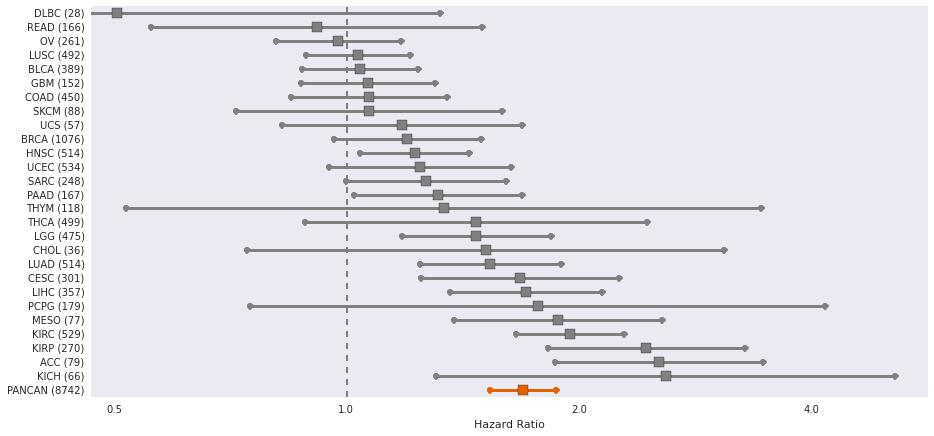

In [31]:
fig, ax = subplots(figsize=(15,7))
c2 = pd.DataFrame([pancan_ci]).append(cc)
colors = ['#E66101'] + (['grey'] * len(cc))
plot_HR(c2, ax=ax, colors=colors)
ax.set_xlim(-1.1, 2.5)
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels(2.**ax.get_xticks())
codes_f = codes.ix[(codes.index.intersection(v.index).intersection(stage.index).
                    intersection(age.index).intersection(old.index))]
label = ['{} ({})'.format(i,c) for i,c in 
         codes_f.value_counts().ix[cc.index].iteritems()]
label = ['PANCAN ({})'.format(len(codes_f))] + label
ax.set_yticklabels(label);
ax.set_xlabel('Hazard Ratio')

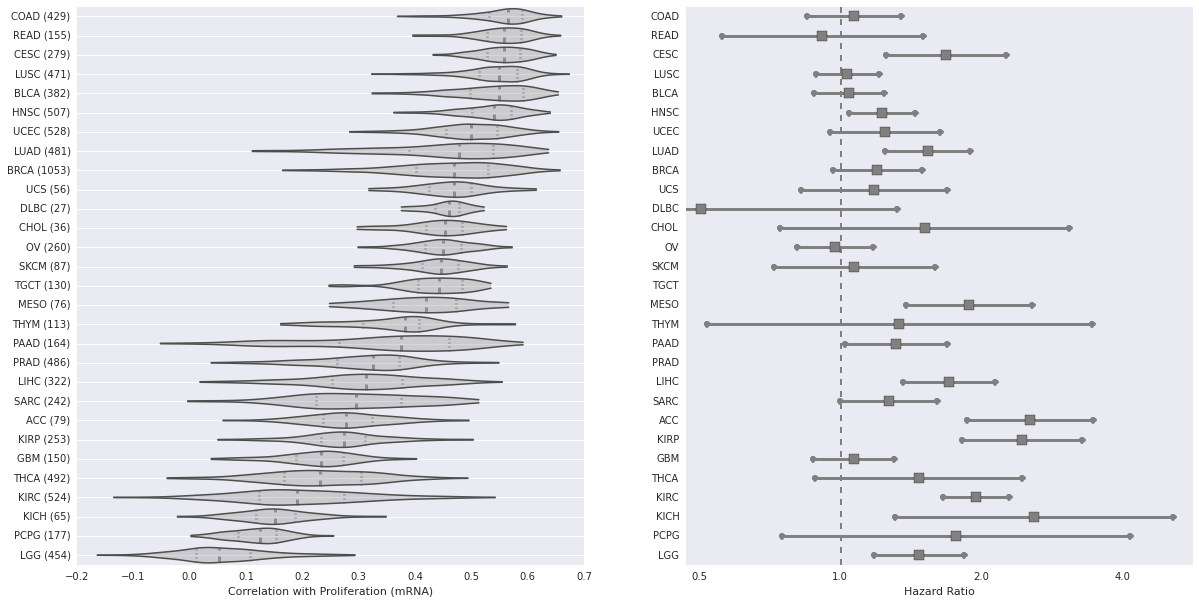

In [32]:
fig, axs = subplots(1, 2, figsize=(20,10))
ax = axs[0]
zscore = lambda s: (s - s.mean()) / s.std()
vv= rp[:,'01'].ix[surv_5y.unstack().index].dropna()
z = vv.groupby(codes).apply(zscore)
v2 = vv[z.abs() < 3]
o = v2.groupby(codes).median().order().index
labels = vv.groupby(codes).size().ix[o]
labels = ['{} ({})'.format(i,v) for i,v in labels.iteritems()]
sns.violinplot(v2, groupby=codes, vert=False,
               bw='scott', cut=0, 
               order=o,
               color='grey', alpha=.3,
               inner_kws={'lw':3, 'alpha':1,'color':'black'},
               names=labels,
               ax=axs[0])
ax.set_xlabel('Correlation with Proliferation (mRNA)')

ax = axs[1]
c2 = pd.DataFrame([pancan_ci]).append(cc)
colors = ['#E66101'] + (['grey'] * len(cc))
plot_HR(c2.ix[o], ax=ax)
ax.set_xlim(-1.1, 2.5)
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels(2.**ax.get_xticks())
ax.set_xlabel('Hazard Ratio')

sns.despine(fig)

In [38]:
vv= rp[:,'01'].ix[surv_5y.unstack().index].dropna()
pearson_pandas(vv.groupby(codes).median(), cc['exp(coef)'])

rho   -0.55
p      0.00
dtype: float64

In [50]:
plt.plot?

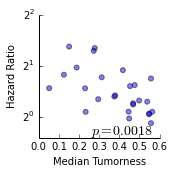

In [61]:
fig, ax = subplots(figsize=(2.5, 2.5))
cc = pd.concat(ci).xs('feature', level=1)
cc = cc[(cc['upper .95'] - cc['lower .95']) < 4]
v = rp[:,'01'].ix[surv_5y.unstack().index].dropna()
series_scatter(v.groupby(codes).median(), cc['exp(coef)'],
              ax=ax, ann='fancy_p', s=25,
              lw=1)
prettify_ax(ax)
ax.set_yscale('log', basey=2)
ax.set_ylim(.75,4.)
ax.set_xlabel('Median Tumorness')
ax.set_ylabel('Hazard Ratio')
fig.tight_layout()
fig.savefig('/cellar/users/agross/Desktop/Figures/HR_vs_proliferation.png',
            dpi=300)

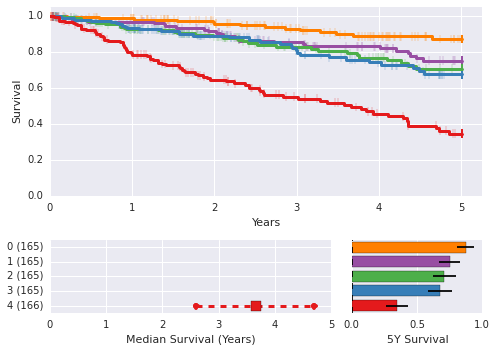

In [46]:
pts = ti(codes.str.startswith('K')).intersection(ti(age < 85))
v2 = np.floor(v.ix[pts].dropna().rank(pct=True) * 5).clip(0,4)
survival_and_stats(v2, surv_5y)

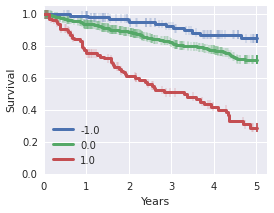

In [49]:
pts = ti(codes.str.startswith('K')).intersection(ti(age < 85))
draw_survival_curve(to_quants(v.ix[pts].dropna(), std=1), surv_5y)

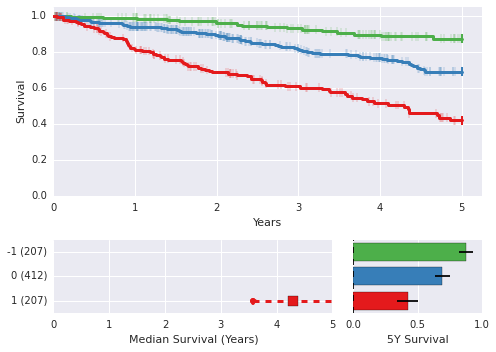

In [35]:
pts = ti(codes.str.startswith('K')).intersection(ti(age < 85))
survival_and_stats(to_quants(v.ix[pts].dropna(), q=.25), surv_5y)

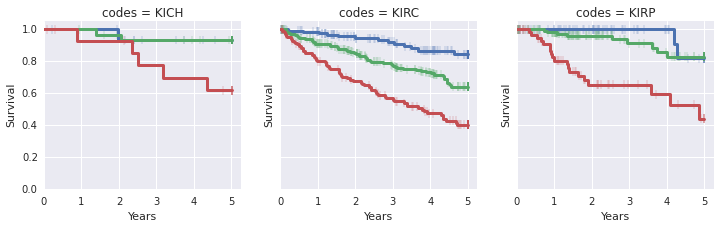

In [35]:
pts = ti(codes.str.startswith('K'))
draw_survival_curves(v.ix[pts].dropna(), surv_5y, codes.ix[pts].dropna())

In [65]:
import seaborn as sns
sns.set_context('paper',font_scale=1.5)
sns.set_style('white')

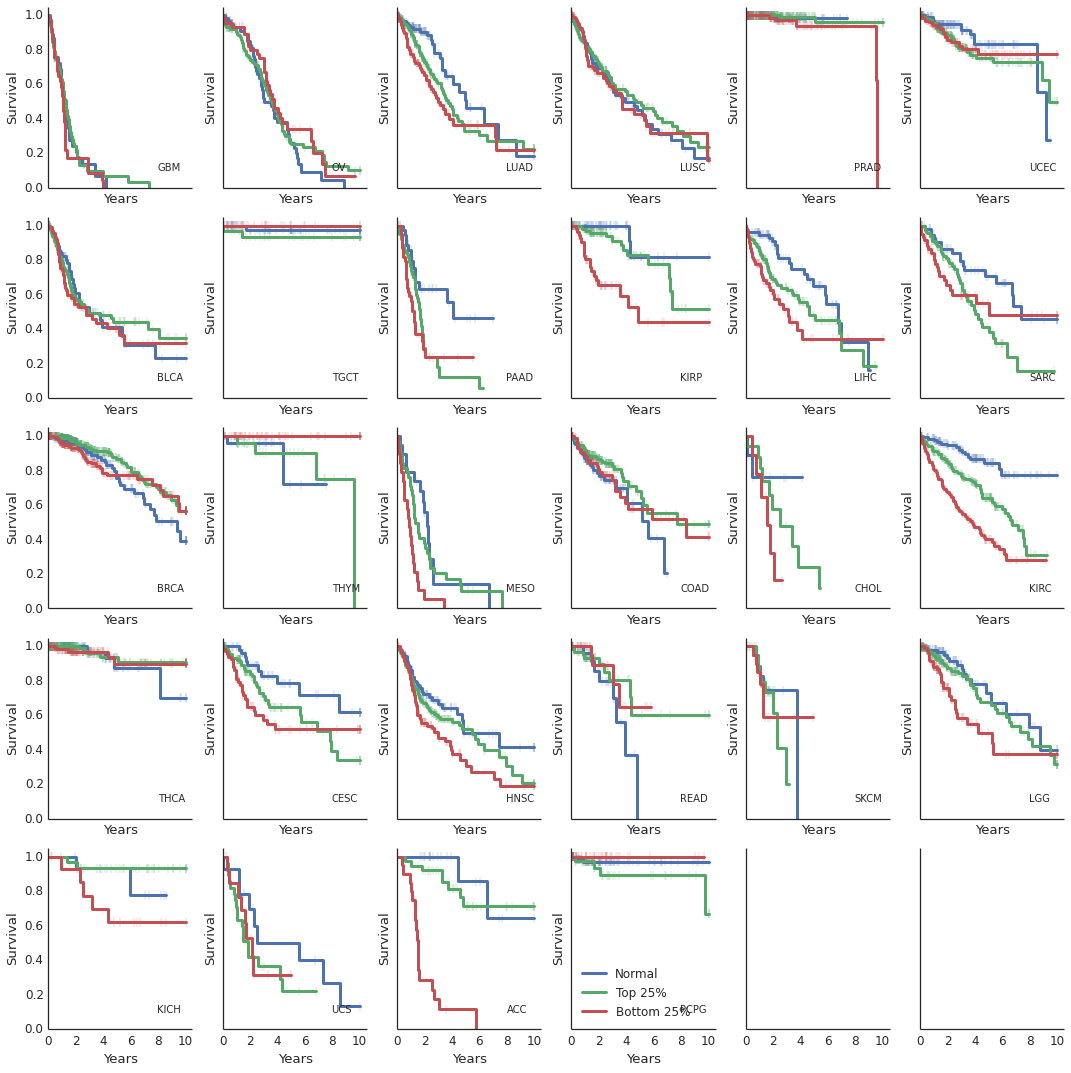

In [67]:
cc = codes.ix[v.index].dropna()
ss = surv_10y.unstack().index
cc = cc[cc.isin(ti(cc.value_counts()  > 30))]
fig, axs = subplots(5,6, figsize=(15,15), sharey=True, sharex=True)
axs = axs.flatten()
for i,c in enumerate(cc.unique()):
    ax = axs[i]
    ax.annotate(c, (8, .1))
    draw_survival_curve(v.ix[ss].ix[ti(cc==c)].dropna(), surv_10y,
                        ax=ax)
    ax.legend_.set_visible(False)
ax.legend_.set_visible(True)
fig.tight_layout()
sns.despine(fig)
fig.savefig('/cellar/users/agross/Desktop/Figures/tumorness_by_tissue.png',
            dpi=300)

In [37]:
v = rp.ix[:, '01'].dropna()
v = v - codes.map(v.groupby(codes).median())
v = v.dropna()
v.name = 'f'

In [38]:
get_cox_ph_ms(surv_5y, v, [codes, stage, old], interactions=False)

LR                                                    3.93e-27
feature_p                                                    0
fmla         Surv(days, event) ~ feature + codes + stage + ...
hazzard                                                     23
dtype: object

In [39]:
get_cox_ph_ms(surv_5y, v, [codes, old], interactions=False)

LR                                                    1.68e-37
feature_p                                                    0
fmla         Surv(days, event) ~ feature + codes + age_over...
hazzard                                                     40
dtype: object

In [40]:
get_cox_ph_ms(surv_5y, v.ix[keepers], [codes, stage, old, age], interactions=False)

LR                                                    1.46e-17
feature_p                                             1.11e-16
fmla         Surv(days, event) ~ feature + codes + stage + ...
hazzard                                                   17.6
dtype: object

In [41]:
mut_all = pd.read_csv('/cellar/users/agross/TCGA_Code/TCGA/Data/MAFs_new_2/meta.csv', 
                      index_col=[1,2])
mut = mut_all['0'].unstack().fillna(0)
mut = FH.fix_barcode_columns(mut)
mut = mut.xs('01', axis=1, level=1)
mut = mut.ix[rna_df.index].dropna()

In [42]:
(mut.sum(1) > 200).value_counts()

False    17048
True      2591
dtype: int64

In [43]:
rr = screen_feature(v>0, rev_kruskal, mut[mut.sum(1) > 50],
                    align=False)

In [44]:
rr.head(10)

,H,p,q
TP53,65.42,4.08e-14,4.96e-10
BAP1,21.35,2.70e-04,8.09e-01
SORCS1,25.53,2.72e-04,8.09e-01
C6orf118,17.25,6.28e-04,8.09e-01
BRAF,22.71,8.98e-04,8.09e-01
DDX41,18.40,1.03e-03,8.09e-01
OR5W2,16.13,1.07e-03,8.09e-01
CCDC132,21.02,1.82e-03,8.09e-01
EPN3,14.71,2.08e-03,8.09e-01
P2RY2,11.96,2.53e-03,8.09e-01
